In [35]:
import pandas as pd
import numpy as np

In [2]:
# seperated by commas so sue sep param
# df = pd.read_csv("cardio_train.csv")
# df.head(5)

df = pd.read_csv("cardio_train.csv",sep=";")
df.head(5)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
# here the ap_high is arterial pressure which is high or low
"""
NOTE that this is from kaggle.com dataset ididnt knew some of the fullforms and the dtype
Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
"""
df.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [4]:
print("rows",df.shape[0])

rows 70000


In [5]:
# rows with missing values 
rows_with_missing = df[df.isna().any(axis=1)]
print(rows_with_missing)
# the rows are all filled but the problem is that the data is wrongly given like it has values that it should not have noise 


Empty DataFrame
Columns: [id, age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio]
Index: []


In [6]:
df.describe()
# i think d the id is of no worth so ro remove its better 

df = df.drop(["id"],axis=1)
df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df['age'] = df['age']//365
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
duplicated = df[df.duplicated()]
duplicated.shape
# there are total of (3208, 12) duplicate rows and i think we need to delete it as it will probably create overfittnig 

(3208, 12)

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(66792, 12)

# finding the rows and modifying if not on general values 

In [11]:
# finding total rows where ap_high is -ve or ap_low is -ve
row_with_ap_negitive = df[(df['ap_hi'] < 0) | (df['ap_lo'] < 0)].shape[0]
print(row_with_ap_negitive)

# so as there are only 8 rows that has thing things we will drop them 
df = df[(df['ap_hi'] >= 0) & (df['ap_lo'] >= 0)]


8


In [12]:
print("after removing the rows that are having -ve aplow and high",df.shape[0])

after removing the rows that are having -ve aplow and high 66784


In [13]:
# checking the total rows that dont have ap_high and low in generatl values like 
print("total rows that are not in this generaal range for ap",df.shape[0] - df[
    (df['ap_hi'].between(70, 250)) &
    (df['ap_lo'].between(40, 150)) &
    (df['ap_hi'] > df['ap_lo'])
].shape[0])

rem_ap_negs = df[
    (df['ap_hi'].between(50, 250)) &
    (df['ap_lo'].between(30, 150)) &
    (df['ap_hi'] > df['ap_lo'])
]


"""
NOTE : what i think is that imputing 1380 rows is not a good idea at all as if can fake what is the actual thing and can create problem
"""


rem_ap_negs.shape

total rows that are not in this generaal range for ap 1324


(65467, 12)

In [14]:
# describing after removing duplictes and also the one that of ap not in range
pu = rem_ap_negs.drop(['gender','gluc','cholesterol','smoke','alco','active','cardio'],axis=1)
pu.describe()
# rem_ap_negs.describe()

,age,height,weight,ap_hi,ap_lo
count,65467.000000,65467.000000,65467.000000,65467.000000,65467.000000
mean,52.847526,164.343303,74.435983,126.982907,81.377289
std,6.806875,8.308967,14.520141,16.983507,9.624667
min,29.000000,55.000000,11.000000,60.000000,30.000000
25%,48.000000,159.000000,65.000000,120.000000,80.000000
50%,53.000000,165.000000,72.000000,120.000000,80.000000
75%,58.000000,170.000000,82.000000,140.000000,90.000000
max,64.000000,250.000000,200.000000,240.000000,150.000000


In [15]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66784.000000,66784.000000,66784.000000,66784.000000,66784.000000,66784.000000,66784.000000,66784.000000,66784.000000,66784.000000,66784.000000,66784.000000
mean,52.859757,1.356193,164.341908,74.522031,129.259493,97.450707,1.382741,1.236134,0.092148,0.056301,0.798545,0.511934
std,6.803224,0.478877,8.334225,14.580646,157.637305,192.916792,0.690156,0.582092,0.289237,0.230504,0.401090,0.499861
min,29.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# df[
#     (df['ap_hi'].between(50, 250)) &
#     (df['ap_lo'].between(30, 150)) &
#     (df['ap_hi'] > df['ap_lo'])
# ].shape[0]

## we will not perform the 2 below steps of getting height and weight in range as they now i think are in proper range of what they shoydl be in

In [17]:
# rem_also_height = rem_ap_negs[(rem_ap_negs['height'] >=150) & (rem_ap_negs['height'] <=182)]
# rem_also_height.shape

In [18]:
# rem_weight = rem_also_height[(rem_also_height['weight'] >=35) & (rem_ap_negs['weight'] <=140)]
# rem_weight.shape

In [19]:
# rem_weight.describe()

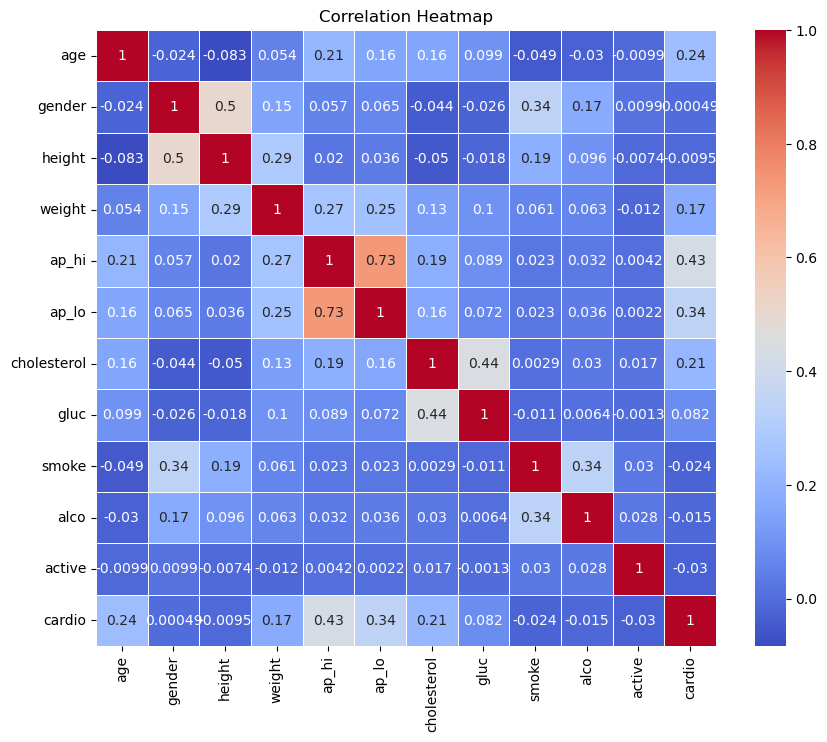

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = rem_ap_negs.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [21]:
print("total size ",rem_ap_negs.shape[0])

total size  65467


## MODELS

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = rem_ap_negs.drop('cardio',axis=1)
y = rem_ap_negs['cardio']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train,y_train)
y_pred = logistic.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)

print("accuracy with logistic regression is ",accuracy)

accuracy with logistic regression is  0.7355277226210478


In [23]:
from sklearn.ensemble import RandomForestClassifier

X = rem_ap_negs.drop('cardio',axis=1)
y = rem_ap_negs['cardio']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train,y_train)
y_pred_rf = rfc.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.6961967313273255


In [52]:
# pip install xgboost

  Using cached xgboost-3.1.2-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.1.2-py3-none-win_amd64.whl (72.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [27]:
import xgboost as xgb 
from sklearn.model_selection import train_test_split 

model_xgb = xgb.XGBClassifier(use_lable_encoder=False,eval_metric='mlogloss')
model_xgb.fit(X_train,y_train)

y_pred = model_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test,y_pred)
print(f"XGBoost Accuracy: {accuracy_xgb}")

D:\files\Lib\site-packages\xgboost\training.py:199: UserWarning: [19:52:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_lable_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.736367802046739


In [25]:
print("as")

as


In [26]:
from sklearn.svm import SVC
print("h")
svm = SVC(kernel='rbf',random_state=42)
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f"SVC Accuracy: {accuracy}")


h
SVC Accuracy: 0.7302581334962578


In [31]:
import joblib
joblib.dump(model_xgb,"xgb.pkl")


['xgb.pkl']

In [39]:
loaded_model = joblib.load("xgb.pkl")
new_data = np.array([[56, 2, 166, 80.0, 160, 100, 1, 1, 0, 0, 1]])
new_data2 = np.array([[64, 1, 169, 68.0, 120, 80, 1, 1, 0, 0, 0]])

d1 = loaded_model.predict(new_data)
d2 = loaded_model.predict(new_data2)
print(d1)
print(d2)

[1]
[1]


In [40]:
# X_test.head(50)

In [41]:
train_distribution = y_train.value_counts(normalize=True) * 100  # cardio nu split ketlu che
print("Training Set Distribution:")
print(train_distribution)


Training Set Distribution:
cardio
1    50.686422
0    49.313578
Name: proportion, dtype: float64


In [42]:
X_test.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active'],
      dtype='object')